In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats

In [3]:
auspop_df=pd.read_csv("Resources/AUSPOP.csv")
dfwpop_df=pd.read_csv("Resources/DFWPOP.csv")
elppop_df=pd.read_csv("Resources/ELPPOP.csv")
htnpop_df=pd.read_csv("Resources/HTNPOP.csv")
mclpop_df=pd.read_csv("Resources/MCLPOP.csv")
satpop_df=pd.read_csv("Resources/SATPOP.csv")

In [4]:
population_df = pd.merge(auspop_df,dfwpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,elppop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,htnpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,mclpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,satpop_df, on="DATE",how="outer")

population_df['DATE']=pd.to_datetime(population_df['DATE'],infer_datetime_format=True)

population_df.head()

DATE    AUSPOP    DFWPOP   ELPPOP    HTNPOP   MCLPOP    SATPOP
0 2000-01-01  1265.715  5196.188  680.942  4739.414  573.398  1719.262
1 2001-01-01  1324.426  5354.623  684.780  4851.189  588.533  1743.796
2 2002-01-01  1353.176  5476.578  688.771  4978.638  607.449  1777.397
3 2003-01-01  1382.693  5582.033  694.672  5084.017  627.164  1808.267
4 2004-01-01  1418.999  5689.982  702.433  5190.444  646.523  1843.927

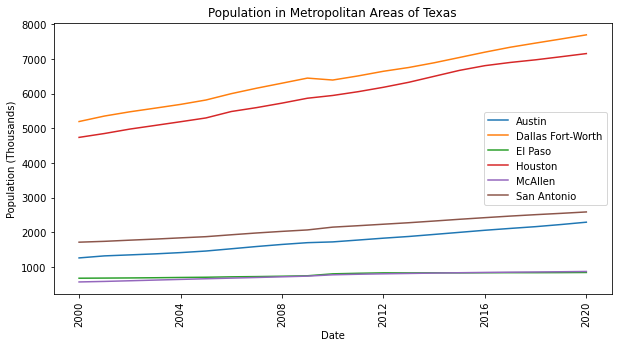

In [5]:
plt.figure(figsize=(10,5))
plt.plot(population_df['DATE'],population_df['AUSPOP'],label='Austin')
plt.plot(population_df['DATE'],population_df['DFWPOP'],label='Dallas Fort-Worth')
plt.plot(population_df['DATE'],population_df['ELPPOP'],label='El Paso')
plt.plot(population_df['DATE'],population_df['HTNPOP'],label='Houston')
plt.plot(population_df['DATE'],population_df['MCLPOP'],label='McAllen')
plt.plot(population_df['DATE'],population_df['SATPOP'],label='San Antonio')

plt.legend(loc='best')

plt.title("Population in Metropolitan Areas of Texas")
plt.xlabel("Date")
plt.ylabel("Population (Thousands)")

plt.xticks(rotation="vertical")
plt.savefig('Results/MetroPopulation.png')
plt.show()

In [6]:
listings_df=pd.read_csv("Resources/metro_listings.csv")
listings_df.set_index('RegionName', inplace=True)
texas_listings_df= listings_df[listings_df['StateName'] == 'TX']
texas_listings_df = texas_listings_df.drop(["RegionID", "SizeRank", "RegionType","StateName"], axis=1)
texas_listings_df
tx_list_df = texas_listings_df.T
tx_list_df.index.name = "DATE"
tx_list_df.reset_index(inplace=True)
tx_list_df['DATE']=pd.to_datetime(tx_list_df['DATE'],infer_datetime_format=True)
tx_list_df.head()

RegionName       DATE  Dallas-Fort Worth, TX  Houston, TX  San Antonio, TX  \
0          2018-01-31                24283.0      32985.0          11343.0   
1          2018-02-28                23203.0      32147.0          11205.0   
2          2018-03-31                24345.0      33766.0          11885.0   
3          2018-04-30                26749.0      35826.0          12721.0   
4          2018-05-31                29538.0      38655.0          13431.0   

RegionName  Austin, TX  El Paso, TX  McAllen, TX  
0               7955.0       4534.0       2150.0  
1               7577.0       4565.0       2160.0  
2               8158.0       4622.0       2225.0  
3               9160.0       4627.0       2258.0  
4              10295.0       4551.0       2302.0

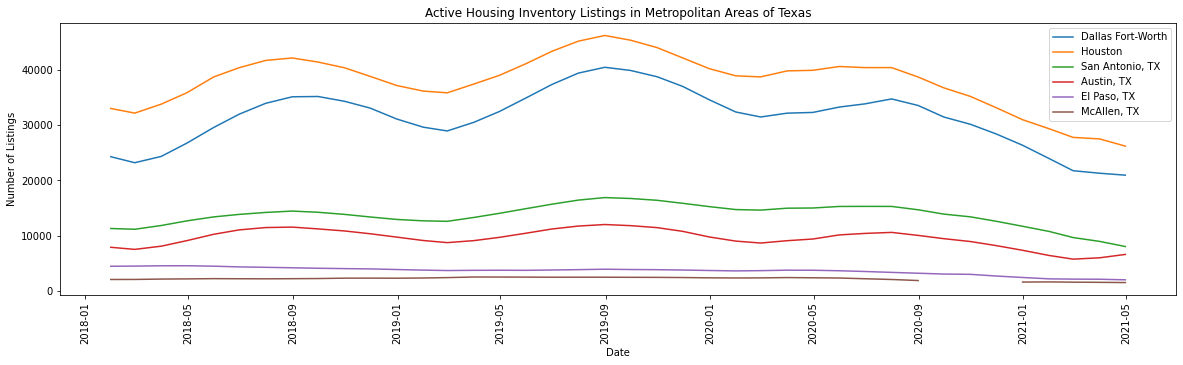

In [7]:
plt.figure(figsize=(20,5))
plt.plot(tx_list_df['DATE'],tx_list_df['Dallas-Fort Worth, TX'],label='Dallas Fort-Worth')
plt.plot(tx_list_df['DATE'],tx_list_df['Houston, TX'],label='Houston')
plt.plot(tx_list_df['DATE'],tx_list_df['San Antonio, TX'],label='San Antonio, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['Austin, TX'],label='Austin, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['El Paso, TX'],label='El Paso, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['McAllen, TX'],label='McAllen, TX')

plt.legend(loc='best')

plt.title("Active Housing Inventory Listings in Metropolitan Areas of Texas")
plt.xlabel("Date")
plt.ylabel("Number of Listings")

plt.xticks(rotation="vertical")
plt.savefig('Results/HistoricalListings.png')
plt.show()

In [8]:
prices_df=pd.read_csv("Resources/metro_median_value.csv")
prices_df.set_index('RegionName', inplace=True)
#prices_df['DATE']=pd.to_datetime(prices_df['DATE'],infer_datetime_format=True)
#prices_df.head()
texas_prices_df= prices_df[prices_df['StateName'] == 'TX']
texas_prices_df = texas_prices_df.drop(["RegionID", "SizeRank", "RegionType","StateName"], axis=1)
tx_prices_df = texas_prices_df.T
tx_prices_df.index.name = "DATE"
tx_prices_df.reset_index(inplace=True)
tx_prices_df['DATE']=pd.to_datetime(tx_prices_df['DATE'],infer_datetime_format=True)
tx_prices_filt_df = tx_prices_df[['DATE','Dallas-Fort Worth, TX','Houston, TX','San Antonio, TX','Austin, TX','El Paso, TX','McAllen, TX']]
tx_prices_filt_df.head()

RegionName       DATE  Dallas-Fort Worth, TX  Houston, TX  San Antonio, TX  \
0          1996-01-31               112230.0     109810.0         107511.0   
1          1996-02-29               112293.0     109885.0         107463.0   
2          1996-03-31               112454.0     109894.0         107415.0   
3          1996-04-30               112775.0     110042.0         107379.0   
4          1996-05-31               113120.0     110182.0         107290.0   

RegionName  Austin, TX  El Paso, TX  McAllen, TX  
0             170740.0      86922.0          NaN  
1             169874.0      86835.0          NaN  
2             168631.0      86814.0          NaN  
3             166862.0      86784.0          NaN  
4             166396.0      86883.0          NaN

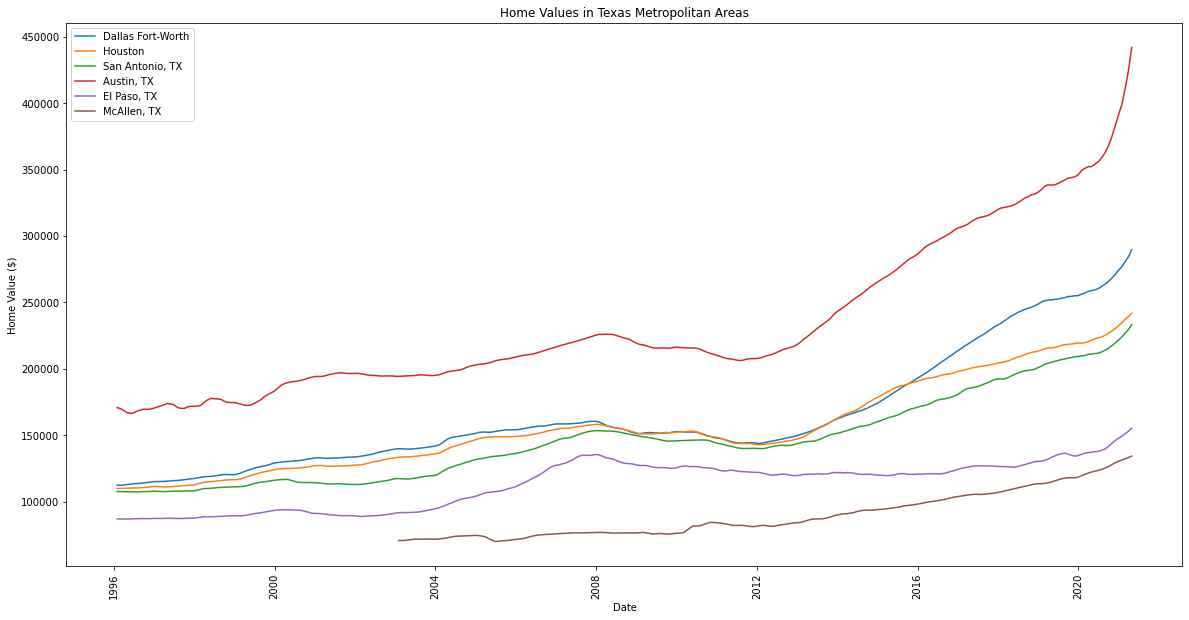

In [9]:
plt.figure(figsize=(20,10))
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Dallas-Fort Worth, TX'],label='Dallas Fort-Worth')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Houston, TX'],label='Houston')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['San Antonio, TX'],label='San Antonio, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Austin, TX'],label='Austin, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['El Paso, TX'],label='El Paso, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['McAllen, TX'],label='McAllen, TX')

plt.legend(loc='best')

plt.title("Home Values in Texas Metropolitan Areas")
plt.xlabel("Date")
plt.ylabel("Home Value ($)")

plt.xticks(rotation="vertical")
plt.savefig('Results/MedianHousingPrice.png')
plt.show()

In [10]:
pricesList_df = pd.merge(tx_list_df,tx_prices_filt_df,on="DATE",how="left")
pricesList_df.head()

RegionName       DATE  Dallas-Fort Worth, TX_x  Houston, TX_x  \
0          2018-01-31                  24283.0        32985.0   
1          2018-02-28                  23203.0        32147.0   
2          2018-03-31                  24345.0        33766.0   
3          2018-04-30                  26749.0        35826.0   
4          2018-05-31                  29538.0        38655.0   

RegionName  San Antonio, TX_x  Austin, TX_x  El Paso, TX_x  McAllen, TX_x  \
0                     11343.0        7955.0         4534.0         2150.0   
1                     11205.0        7577.0         4565.0         2160.0   
2                     11885.0        8158.0         4622.0         2225.0   
3                     12721.0        9160.0         4627.0         2258.0   
4                     13431.0       10295.0         4551.0         2302.0   

RegionName  Dallas-Fort Worth, TX_y  Houston, TX_y  San Antonio, TX_y  \
0                          234443.0       204702.0           192247.0   
1                          236069.0       205167.0           192314.0   
2                          237897.0       205765.0           193275.0   
3                          239575.0       206788.0           194442.0   
4                          240988.0       207910.0           195716.0   

RegionName  Austin, TX_y  El Paso, TX_y  McAllen, TX_y  
0               321045.0       126318.0       107376.0  
1               321433.0       126329.0       107953.0  
2               321976.0       126216.0       108529.0  
3               322539.0       125990.0       109086.0  
4               323535.0       125896.0       109649.0

In [11]:
tx_list_df2=tx_prices_filt_df.rename(columns={'DATE':'dateO'})


tx_list_df2['DATE'] = tx_list_df2['dateO'] +  pd.DateOffset(1)
tx_list_df2.head()

RegionName      dateO  Dallas-Fort Worth, TX  Houston, TX  San Antonio, TX  \
0          1996-01-31               112230.0     109810.0         107511.0   
1          1996-02-29               112293.0     109885.0         107463.0   
2          1996-03-31               112454.0     109894.0         107415.0   
3          1996-04-30               112775.0     110042.0         107379.0   
4          1996-05-31               113120.0     110182.0         107290.0   

RegionName  Austin, TX  El Paso, TX  McAllen, TX       DATE  
0             170740.0      86922.0          NaN 1996-02-01  
1             169874.0      86835.0          NaN 1996-03-01  
2             168631.0      86814.0          NaN 1996-04-01  
3             166862.0      86784.0          NaN 1996-05-01  
4             166396.0      86883.0          NaN 1996-06-01

In [12]:
pop_comp_df=pd.merge(population_df,tx_list_df2, on="DATE",how="inner")
pop_comp_df.dropna()
pop_comp_df.head()

DATE    AUSPOP    DFWPOP   ELPPOP    HTNPOP   MCLPOP    SATPOP  \
0 2000-01-01  1265.715  5196.188  680.942  4739.414  573.398  1719.262   
1 2001-01-01  1324.426  5354.623  684.780  4851.189  588.533  1743.796   
2 2002-01-01  1353.176  5476.578  688.771  4978.638  607.449  1777.397   
3 2003-01-01  1382.693  5582.033  694.672  5084.017  627.164  1808.267   
4 2004-01-01  1418.999  5689.982  702.433  5190.444  646.523  1843.927   

       dateO  Dallas-Fort Worth, TX  Houston, TX  San Antonio, TX  Austin, TX  \
0 1999-12-31               129076.0     123947.0         116054.0    183251.0   
1 2000-12-31               132749.0     126936.0         114142.0    194120.0   
2 2001-12-31               133590.0     127313.0         112824.0    196375.0   
3 2002-12-31               139515.0     132861.0         117141.0    194303.0   
4 2003-12-31               141772.0     135887.0         119736.0    195094.0   

   El Paso, TX  McAllen, TX  
0      93338.0          NaN  
1      91038.0          NaN  
2      89130.0          NaN  
3      91277.0          NaN  
4      94558.0      71664.0

In [18]:
aus_df=pop_comp_df[['DATE','AUSPOP','Austin, TX']]
dfw_df=pop_comp_df[['DATE','DFWPOP','Dallas-Fort Worth, TX']]
elp_df=pop_comp_df[['DATE','ELPPOP','El Paso, TX']]
htn_df=pop_comp_df[['DATE','HTNPOP','Houston, TX']]
mcl_df=pop_comp_df[['DATE','MCLPOP','McAllen, TX']]
sat_df=pop_comp_df[['DATE','SATPOP','San Antonio, TX']]

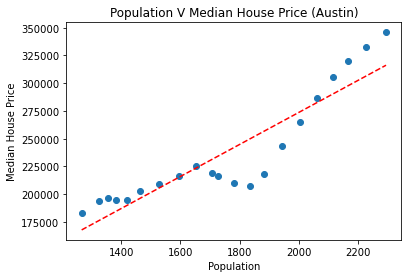

144.18084574657232


In [19]:
#Austin
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['AUSPOP'],pop_comp_df['Austin, TX'])
pri_fit = pri_slope * pop_comp_df['AUSPOP'] + pri_int

plt.scatter(pop_comp_df['AUSPOP'],pop_comp_df['Austin, TX'])
plt.title('Population V Median House Price (Austin)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['AUSPOP'],pri_fit,"--",color="red")
plt.show()
print(pri_slope)

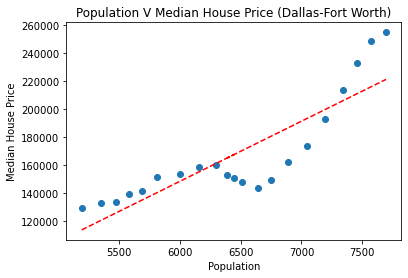

In [20]:
#Dallas FW
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['DFWPOP'],pop_comp_df['Dallas-Fort Worth, TX'])
pri_fit = pri_slope * pop_comp_df['DFWPOP'] + pri_int

plt.scatter(pop_comp_df['DFWPOP'],pop_comp_df['Dallas-Fort Worth, TX'])
plt.title('Population V Median House Price (Dallas-Fort Worth)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['DFWPOP'],pri_fit,"--",color="red")
plt.show()

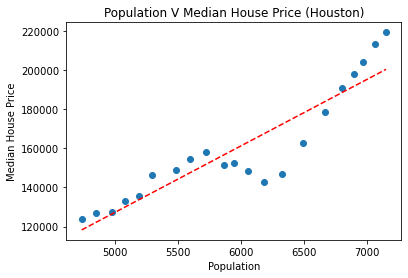

In [21]:
#Houston
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['HTNPOP'],pop_comp_df['Houston, TX'])
pri_fit = pri_slope * pop_comp_df['HTNPOP'] + pri_int

plt.scatter(pop_comp_df['HTNPOP'],pop_comp_df['Houston, TX'])
plt.title('Population V Median House Price (Houston)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['HTNPOP'],pri_fit,"--",color="red")
plt.show()

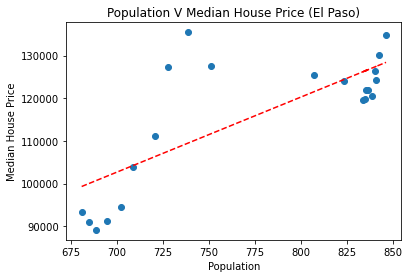

In [22]:
#El Paso
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['ELPPOP'],pop_comp_df['El Paso, TX'])
pri_fit = pri_slope * pop_comp_df['ELPPOP'] + pri_int

plt.scatter(pop_comp_df['ELPPOP'],pop_comp_df['El Paso, TX'])
plt.title('Population V Median House Price (El Paso)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['ELPPOP'],pri_fit,"--",color="red")
plt.show()

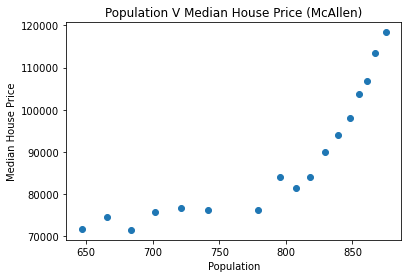

In [23]:
#McAllen
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['MCLPOP'],pop_comp_df['McAllen, TX'])
pri_fit = pri_slope * pop_comp_df['MCLPOP'] + pri_int

plt.scatter(pop_comp_df['MCLPOP'],pop_comp_df['McAllen, TX'])
plt.title('Population V Median House Price (McAllen)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['MCLPOP'],pri_fit,"--",color="red")
plt.show()

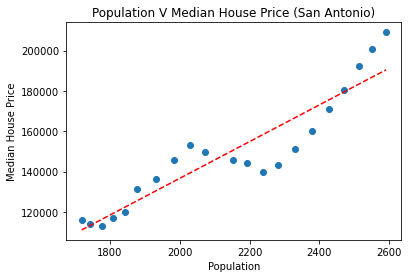

In [24]:
#San Antonio
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(pop_comp_df['SATPOP'],pop_comp_df['San Antonio, TX'])
pri_fit = pri_slope * pop_comp_df['SATPOP'] + pri_int

plt.scatter(pop_comp_df['SATPOP'],pop_comp_df['San Antonio, TX'])
plt.title('Population V Median House Price (San Antonio)')
plt.xlabel('Population')
plt.ylabel('Median House Price')
plt.plot(pop_comp_df['SATPOP'],pri_fit,"--",color="red")
plt.show()

In [30]:
lumber_df=pd.read_csv("Resources/lumber.csv")
lumber_df['DATE']=pd.to_datetime(lumber_df['DATE'],infer_datetime_format=True)
lumber_df

DATE  WPU081
0   2010-01-01   157.2
1   2010-02-01   166.4
2   2010-03-01   169.2
3   2010-04-01   175.8
4   2010-05-01   180.0
..         ...     ...
131 2020-12-01   291.5
132 2021-01-01   320.9
133 2021-02-01   341.9
134 2021-03-01   367.1
135 2021-04-01   388.0

[136 rows x 2 columns]

In [31]:
tx_list_df3=tx_list_df.rename(columns={'DATE':'dateO'})


tx_list_df3['DATE'] = tx_list_df3['dateO'] +  pd.DateOffset(1)
tx_list_df3['DATE']=pd.to_datetime(tx_list_df3['DATE'],infer_datetime_format=True)
tx_list_df3.head()

RegionName      dateO  Dallas-Fort Worth, TX  Houston, TX  San Antonio, TX  \
0          2018-01-31                24283.0      32985.0          11343.0   
1          2018-02-28                23203.0      32147.0          11205.0   
2          2018-03-31                24345.0      33766.0          11885.0   
3          2018-04-30                26749.0      35826.0          12721.0   
4          2018-05-31                29538.0      38655.0          13431.0   

RegionName  Austin, TX  El Paso, TX  McAllen, TX       DATE  
0               7955.0       4534.0       2150.0 2018-02-01  
1               7577.0       4565.0       2160.0 2018-03-01  
2               8158.0       4622.0       2225.0 2018-04-01  
3               9160.0       4627.0       2258.0 2018-05-01  
4              10295.0       4551.0       2302.0 2018-06-01

In [39]:
lumbvlist_df=pd.merge(tx_list_df3,lumber_df, on="DATE",how="inner")
lumbvlist_df

dateO  Dallas-Fort Worth, TX  Houston, TX  San Antonio, TX  \
0  2018-01-31                24283.0      32985.0          11343.0   
1  2018-02-28                23203.0      32147.0          11205.0   
2  2018-03-31                24345.0      33766.0          11885.0   
3  2018-04-30                26749.0      35826.0          12721.0   
4  2018-05-31                29538.0      38655.0          13431.0   
5  2018-06-30                31955.0      40336.0          13887.0   
6  2018-07-31                33918.0      41647.0          14240.0   
7  2018-08-31                35089.0      42086.0          14484.0   
8  2018-09-30                35141.0      41349.0          14269.0   
9  2018-10-31                34278.0      40317.0          13888.0   
10 2018-11-30                33045.0      38765.0          13418.0   
11 2018-12-31                31080.0      37122.0          12976.0   
12 2019-01-31                29607.0      36112.0          12725.0   
13 2019-02-28                28931.0      35806.0          12637.0   
14 2019-03-31                30484.0      37384.0          13333.0   
15 2019-04-30                32445.0      38962.0          14082.0   
16 2019-05-31                34882.0      41059.0          14921.0   
17 2019-06-30                37292.0      43275.0          15720.0   
18 2019-07-31                39353.0      45110.0          16461.0   
19 2019-08-31                40407.0      46141.0          16917.0   
20 2019-09-30                39837.0      45294.0          16755.0   
21 2019-10-31                38705.0      43961.0          16428.0   
22 2019-11-30                36959.0      42092.0          15886.0   
23 2019-12-31                34552.0      40161.0          15288.0   
24 2020-01-31                32346.0      38870.0          14757.0   
25 2020-02-29                31448.0      38671.0          14660.0   
26 2020-03-31                32138.0      39756.0          15003.0   
27 2020-04-30                32267.0      39863.0          15038.0   
28 2020-05-31                33239.0      40550.0          15319.0   
29 2020-06-30                33815.0      40348.0          15332.0   
30 2020-07-31                34703.0      40349.0          15323.0   
31 2020-08-31                33521.0      38650.0          14717.0   
32 2020-09-30                31439.0      36700.0          13937.0   
33 2020-10-31                30134.0      35156.0          13446.0   
34 2020-11-30                28398.0      33132.0          12651.0   
35 2020-12-31                26348.0      30955.0          11744.0   
36 2021-01-31                23952.0      29325.0          10814.0   
37 2021-02-28                21761.0      27767.0           9708.0   
38 2021-03-31                21306.0      27491.0           9017.0   

    Austin, TX  El Paso, TX  McAllen, TX       DATE  WPU081  
0       7955.0       4534.0       2150.0 2018-02-01   237.0  
1       7577.0       4565.0       2160.0 2018-03-01   240.3  
2       8158.0       4622.0       2225.0 2018-04-01   238.4  
3       9160.0       4627.0       2258.0 2018-05-01   249.3  
4      10295.0       4551.0       2302.0 2018-06-01   254.5  
5      11093.0       4420.0       2284.0 2018-07-01   248.0  
6      11514.0       4344.0       2271.0 2018-08-01   231.7  
7      11594.0       4261.0       2294.0 2018-09-01   228.0  
8      11270.0       4176.0       2321.0 2018-10-01   214.2  
9      10901.0       4112.0       2389.0 2018-11-01   209.2  
10     10392.0       4060.0       2394.0 2018-12-01   211.2  
11      9790.0       3947.0       2381.0 2019-01-01   210.0  
12      9178.0       3841.0       2420.0 2019-02-01   215.8  
13      8797.0       3763.0       2490.0 2019-03-01   213.5  
14      9156.0       3803.0       2596.0 2019-04-01   212.6  
15      9750.0       3817.0       2592.0 2019-05-01   210.8  
16     10495.0       3802.0       2578.0 2019-06-01   205.6  
17     11247.0       3862.0       2557.0 2019-07-01   209.9  
18     11782.0       3925.0  

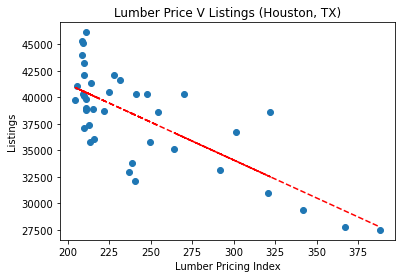

In [40]:
pri_slope, pri_int, pri_r, pri_p, pri_std_err = stats.linregress(lumbvlist_df['WPU081'],lumbvlist_df['Houston, TX'])
pri_fit = pri_slope * lumbvlist_df['WPU081'] + pri_int

plt.scatter(lumbvlist_df['WPU081'],lumbvlist_df['Houston, TX'])
plt.title('Lumber Price V Listings (Houston, TX)')
plt.xlabel('Lumber Pricing Index')
plt.ylabel('Listings')
plt.plot(lumbvlist_df['WPU081'],pri_fit,"--",color="red")
plt.savefig('Results/LumberVHousingListingHou.png')
plt.show()